# Natural Language Processing with Disaster Tweets
This dataset contains a collection of real and fake tweets related to disasters. The goal of this project is to build a machine learning model that can predict whether a tweet is real or fake. Since Twitter is used by both individuals and organizations involved in disaster response, being able to distinguish fake tweets is highly practical and important for public safety.



## Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)

In [ ]:

from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import os

seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ["PYTHONHASHSEED"] = str(seed)

drive.mount('/content/drive')

train_df = pd.read_csv('/content/drive/My Drive/Education/CU/ML3/Week4/data/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Education/CU/ML3/Week4/data/test.csv')

print("Train data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data shape: (7613, 5)
Test data shape: (3263, 4)


In [ ]:
train_df.iloc[30:40]
# The first 10 rows did not have keywords or location, so we show rows of this range

,id,keyword,location,text,target
30,44,NaN,NaN,The end!,0
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


- The ratio of training to test data samples is approximately 2:1.  
  Training data shape: `(7613, 5)`  
  Test data shape: `(3263, 4)`

Below is the official description of each column:

> - **id**: A unique identifier for each tweet  
> - **text**: The content of the tweet  
> - **location**: The location the tweet was sent from (may be blank)  
> - **keyword**: A specific keyword from the tweet (may be blank)  
> - **target**: *(Only in `train.csv`)* Indicates whether the tweet is about a real disaster (1) or not (0)


### target
- There is no clear imbalance.

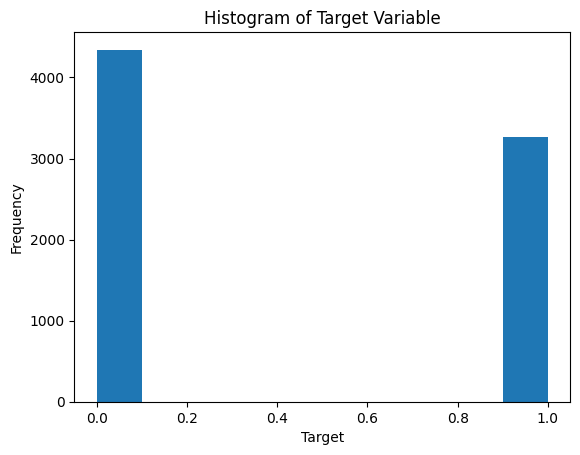

In [ ]:
plt.hist(train_df['target'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable')
plt.show()


### Text

- There is no obvious difference in text length between positive and negative samples.  
- Some tweets contain hashtags. While the number of hashtags does not vary significantly between the two categories, the content of the hashtags appears to differ.


In [ ]:
keyword = "earthquake"  # Let's have a look at tweets about earthquake
keyword_tweets = train_df[train_df['keyword'] == keyword]

# target positive/negative (not sentiment analysis)
positive_tweets = keyword_tweets[keyword_tweets['target'] == 1]['text'].sample(5).tolist()
negative_tweets = keyword_tweets[keyword_tweets['target'] == 0]['text'].sample(5).tolist()

print("Positive Tweets:")
for tweet in positive_tweets:
  print(tweet)
  print("---")

print("\nNegative Tweets:")
for tweet in negative_tweets:
  print(tweet)
  print("---")

Positive Tweets:
Sure the #Megaquake story brought a sense of panic but the question is: will anything really change? http://t.co/9f3rDN9N3D
---
USGS reports a M1.94 #earthquake 5km S of Volcano Hawaii on 8/6/15 @ 1:04:01 UTC http://t.co/Njd28pg9Xv #quake
---
@DArchambau THX for your great encouragement and for RT of NEW VIDEO http://t.co/cybKsXHF7d The Coming Apocalyptic US Earthquake &amp; Tsunami
---
'There was a small earthquake in LA but don't worry Emily Rossum is fine' #difficultpeople is great
---
USGS EQ: M 0.6 - 8km SSW of Anza California: Time2015-08-06 01:26:24 UTC2015-08-05 18:26:24 -07:0... http://t.co/3bwWNLsxhB #EarthQuake
---

Negative Tweets:
Posted a new song: 'Earthquake' http://t.co/RfTyyZ4GwJ http://t.co/lau0Ay7ahV
---
There has not been 1 real tear out of #Shelli 's eyes this entire episode. #bb17
---
[GPV Wind] As of 06JST 6AUG: WNW 06JST 6AUG / E 12JST 6AUG / S 18JST 6AUG. http://t.co/l6jBjAj8dm
---
Earthquake drill ??????
---
Put the RIGHT person up on the blo

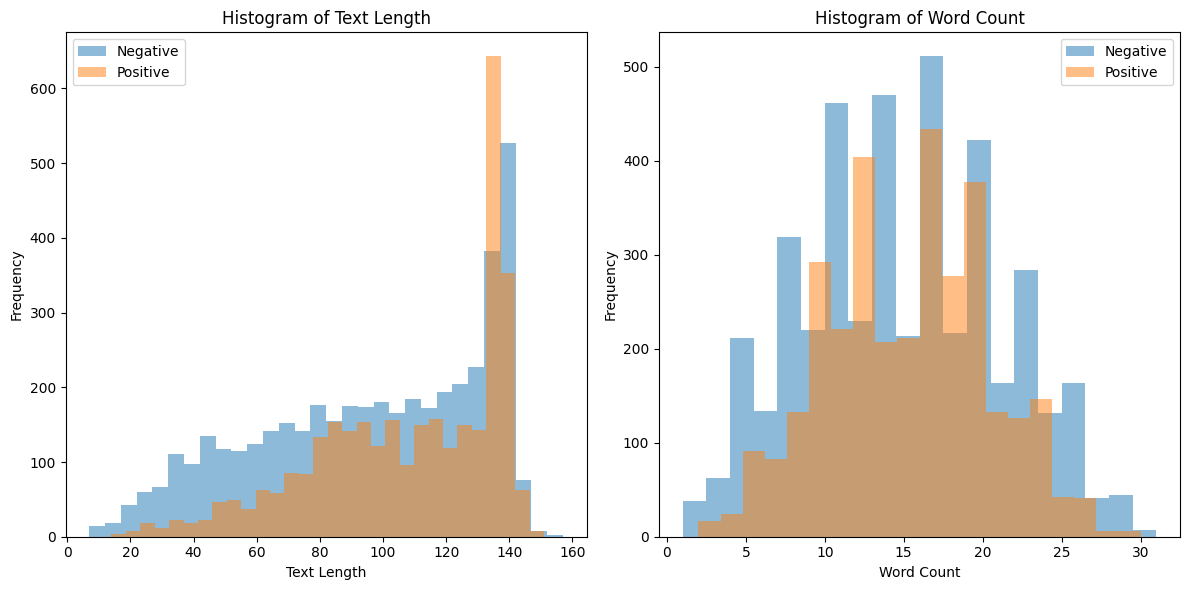

In [ ]:
df_temp = train_df.copy() # Just for this cell

df_temp['text_length'] = df_temp['text'].apply(len)
df_temp['word_count'] = df_temp['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df_temp[df_temp['target'] == 0]['text_length'], bins=30, alpha=0.5, label='Negative')
plt.hist(df_temp[df_temp['target'] == 1]['text_length'], bins=30, alpha=0.5, label='Positive')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Length')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df_temp[df_temp['target'] == 0]['word_count'], bins=20, alpha=0.5, label='Negative')
plt.hist(df_temp[df_temp['target'] == 1]['word_count'], bins=20, alpha=0.5, label='Positive')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
plt.legend()

plt.tight_layout()
plt.show()


Most popular hashtags:
News          38
news          38
hot           31
prebreak      30
best          30
Hiroshima     21
GBBO          17
islam         15
NowPlaying    12
ISIS          11
Name: count, dtype: int64


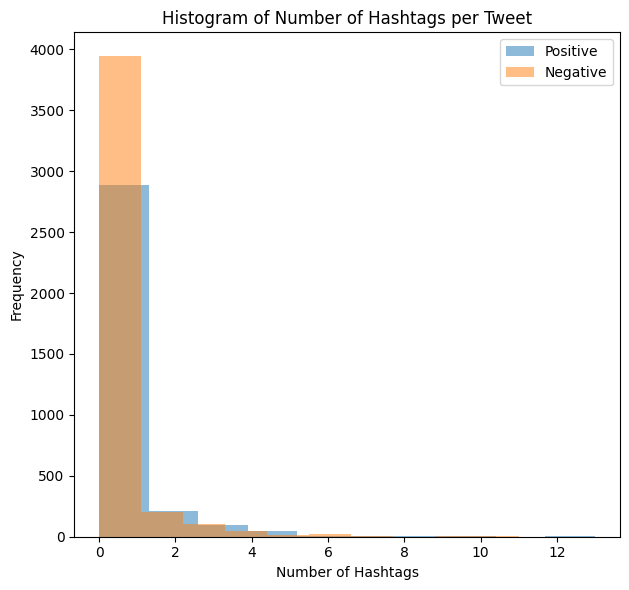

In [ ]:
import re

def extract_hashtags(tweet):
    return re.findall(r"#(\w+)", tweet)

train_df['hashtags'] = train_df['text'].apply(extract_hashtags)
train_df['num_hashtags'] = train_df['hashtags'].apply(len)

all_hashtags = [hashtag for tweet_hashtags in train_df['hashtags'] for hashtag in tweet_hashtags]

hashtag_counts = pd.Series(all_hashtags).value_counts()

print("Most popular hashtags:")
print(hashtag_counts.head(10))


positive_tweets = train_df[train_df['target'] == 1]
negative_tweets = train_df[train_df['target'] == 0]

positive_hashtags = [hashtag for tweet_hashtags in positive_tweets['hashtags'] for hashtag in tweet_hashtags]
negative_hashtags = [hashtag for tweet_hashtags in negative_tweets['hashtags'] for hashtag in tweet_hashtags]


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist([len(hashtags) for hashtags in positive_tweets['hashtags']], bins=10, alpha=0.5, label='Positive')
plt.hist([len(hashtags) for hashtags in negative_tweets['hashtags']], bins=10, alpha=0.5, label='Negative')
plt.xlabel('Number of Hashtags')
plt.ylabel('Frequency')
plt.title('Histogram of Number of Hashtags per Tweet')
plt.legend()

plt.tight_layout()
plt.show()

### Keywords

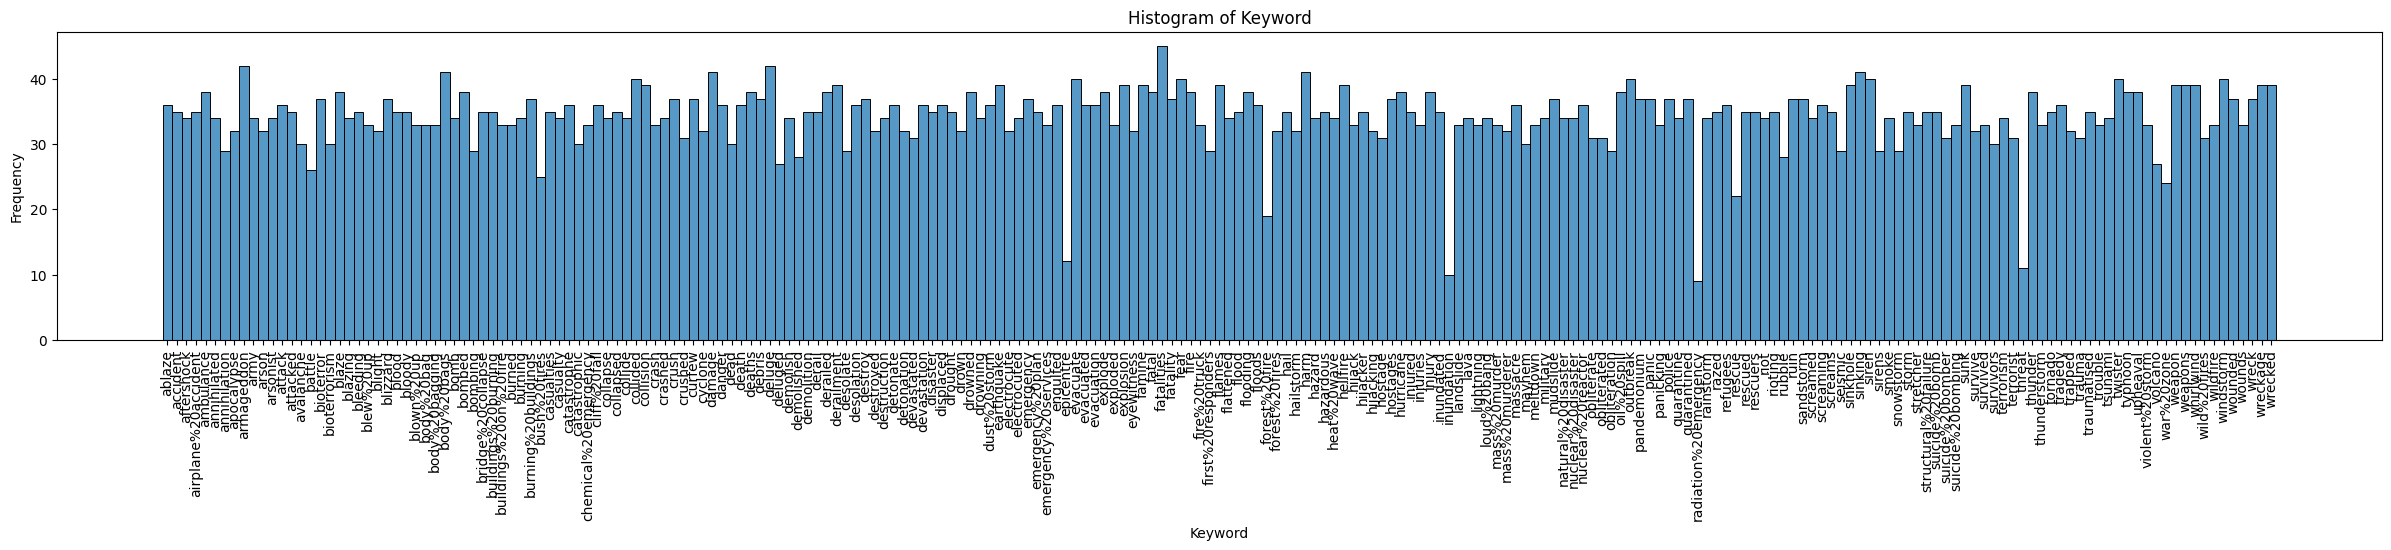

In [ ]:
plt.figure(figsize=(30, 4))
sns.histplot(train_df['keyword'], kde=False)
plt.title('Histogram of Keyword')
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


## location

In [ ]:
train_df['location'].notnull().sum()

5080

In [ ]:
unique_locations = train_df['location'].nunique()
print(f"Number of unique locations: {unique_locations}")

popular_locations = train_df['location'].value_counts().head(10)
print("Most popular locations:")
print(popular_locations)

Number of unique locations: 3341
Most popular locations:
location
USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: count, dtype: int64


### Data split

In [ ]:
train_df['keyword'] = train_df['keyword'].fillna('NaN')


In [ ]:
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(
    train_df,
    test_size=0.2,
    stratify=train_df['keyword'],
    random_state=42,
)

print("Train data shape:", train_df.shape)
print("Valid data shape:", valid_df.shape)


Train data shape: (6090, 7)
Valid data shape: (1523, 7)


### Data Cleaning (Preprocessing)

Since the dataset contains human-written text with various symbols and different forms of words, I applied stopword removal and lemmatization to clean the data.  
(While these preprocessing steps may negatively affect performance in recent language models by removing valuable information, I believe they are appropriate here since we are experimenting with traditional models covered in class.)

- **Stopwords**: These are common words (like *"the"*, *"is"*, *"and"*) that are typically removed during preprocessing because they carry less meaningful information.  
- **Lemmatization**: This reduces words to their base or dictionary form (e.g., *"running"* becomes *"run"*), helping to unify different word forms and reduce vocabulary size.


In [ ]:
import nltk
nltk.download('punkt')

nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def normalize_words(text):
    text = text.lower()

    tokens = word_tokenize(text)

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [word for word in tokens if word.isalnum()]

    return tokens

text = "This is an example sentence! It contains some punctuation."
normalized_tokens = normalize_words(text)
normalized_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['example', 'sentence', 'contains', 'punctuation']

In [ ]:
train_df['normalized_text'] = train_df['text'].apply(normalize_words)
valid_df['normalized_text'] = valid_df['text'].apply(normalize_words)
test_df['normalized_text'] = test_df['text'].apply(normalize_words)

In [ ]:
# Get the max num of words (to determine the shape of input)
all_normalized_texts = train_df['normalized_text'].tolist() + valid_df['normalized_text'].tolist() + test_df['normalized_text'].tolist()

max_words = 0
for text in all_normalized_texts:
  if len(text) > max_words:
    max_words = len(text)

print("Maximum number of words in the combined set:", max_words)

Maximum number of words in the combined set: 23


### Summary of EDA

- There were 7,613 training samples and 3,263 test samples.  
- No significant class imbalance was detected.  
- No obvious difference in text length or hashtag usage was observed.  
- Stopword removal and lemmatization were applied.


## Model Architecture (25 pts)

### Word Preprocessing and Embedding

Here's my understanding of each technique:

**Embedding Methods**:

- **TF-IDF**: A statistical method that reflects how important a word is to a document within a corpus. It does not capture semantic relationships and treats words independently.  
- **GloVe**: A pre-trained word embedding that captures global statistical information from a corpus and encodes semantic similarity in vector space.  
- **Word2Vec**: A neural embedding method that learns word representations based on context. It effectively captures both semantic and syntactic relationships.

We chose **GloVe** because:

- Unlike **TF-IDF**, which produces sparse, high-dimensional vectors without capturing word meanings, GloVe provides dense representations that encode semantic similarity between words.  
- Publicly available pre-trained vectors are provided for Twitter data, which is directly relevant to this task.

> Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. *GloVe: Global Vectors for Word Representation*

---

### Models

To process this type of sequential data, **RNNs** and **Transformers** are among the most widely used approaches. In contrast, conventional classifiers such as **logistic regression**, **SVM**, and **GBDT** are more commonly applied to non-sequential data.

- **RNN (Recurrent Neural Network)**: A neural network architecture designed for sequential data, where each output depends on previous computations.  
- **LSTM (Long Short-Term Memory)**: A type of RNN that mitigates the vanishing gradient problem by introducing memory cells and gates, enabling it to capture long-range dependencies more effectively.

Recently, Transformer models have gained popularity due to their ability to model long-range dependencies using attention mechanisms, their parallelizability, and their superior performance on various NLP tasks.

As seen on the Kaggle leaderboard, most high-performing solutions use Transformer models such as BERT.  
However, since we studied the RNN architecture in class, I used RNN and its variants for this analysis.


### Preprocessing

In [ ]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached smart_open-7.1.0-py3-none-any.whl.metadata (24 kB)
  Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.4 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
Using cached smart_open-7.1.0-py3-none-any.whl (61 kB)
Using cached wrapt-1.17.2-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (83 kB)
  Att

In [ ]:
def predict_and_save_to_csv(model, test_vectors, filename="predictions.csv"):
  """Predicts on test data and saves the predictions to a CSV file.

  Args:
    model: The trained model.
    test_vectors: The vectorized test data.
    filename: The name of the CSV file to save the predictions to.
  """
  predictions = model.predict(test_vectors)
  predicted_labels = (predictions > 0.5).astype(int)

  submission_df = pd.DataFrame({'id': test_df['id'], 'target': predicted_labels.flatten()})
  submission_df.to_csv(f'/content/drive/My Drive/Education/CU/ML3/Week4/{filename}.csv', index=False)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model, name):
  valid_pred = model.predict(valid_vectors)
  valid_df[f'{name}_pred'] = valid_pred

  valid_pred_binary = (valid_pred > 0.5).astype(int)
  valid_df[f'{name}_pred_binary'] = valid_pred_binary
  accuracy = accuracy_score(valid_df['target'], valid_df[f'{name}_pred_binary'])
  precision = precision_score(valid_df['target'], valid_df[f'{name}_pred_binary'])
  recall = recall_score(valid_df['target'], valid_df[f'{name}_pred_binary'])

  # Learning curve (loss)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Learning Curve')
  plt.legend()
  plt.show()

  # Learning curve (accuracy)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.title('Learning Curve')
  plt.legend()
  plt.show()

  predict_and_save_to_csv(model, test_vectors, filename=f"{name}_predictions.csv")

In [ ]:
from gensim.models import KeyedVectors

glove_file = "/content/drive/My Drive/Education/CU/ML3/Week4/glove.twitter.27B.200d.txt"
word_vectors = KeyedVectors.load_word2vec_format(glove_file, binary=False, no_header=True)

def vectorize_tokens(tokens, word_vectors):
    vectors = []
    for token in tokens:
        if token in word_vectors:
            vectors.append(word_vectors[token])
        else:
            vectors.append(np.zeros(word_vectors.vector_size))

    # padding
    if len(vectors) < max_words:
        padding = [np.zeros(word_vectors.vector_size)] * (max_words - len(vectors))
        vectors.extend(padding)
    else:
        vectors = vectors[:max_words]

    return np.array(vectors)

train_vectors = np.array([vectorize_tokens(tokens, word_vectors) for tokens in train_df['normalized_text']])
valid_vectors = np.array([vectorize_tokens(tokens, word_vectors) for tokens in valid_df['normalized_text']])
test_vectors = np.array([vectorize_tokens(tokens, word_vectors) for tokens in test_df['normalized_text']])

train_labels = train_df['target'].values
valid_labels = valid_df['target'].values

### Simple RNN

#### Baseline

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(SimpleRNN(units=128, input_shape=(train_vectors.shape[1], train_vectors.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, start_from_epoch=20)
history = model.fit(train_vectors, train_labels, epochs=100, batch_size=32, validation_data=(valid_vectors, valid_labels), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7154 - loss: 0.5682 - val_accuracy: 0.7768 - val_loss: 0.5387
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8070 - loss: 0.4617 - val_accuracy: 0.7695 - val_loss: 0.5148
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8214 - loss: 0.4299 - val_accuracy: 0.7814 - val_loss: 0.5241
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8364 - loss: 0.4011 - val_accuracy: 0.7905 - val_loss: 0.5092
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8514 - loss: 0.3615 - val_accuracy: 0.7814 - val_loss: 0.5584
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8721 - loss: 0.3187 - val_accuracy: 0.7800 - val_loss: 0.5973
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8954 - loss: 0.2815 - val_accuracy: 0.7748 - val_loss: 0.6450
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9135 - loss: 0.2355 - val_acc

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


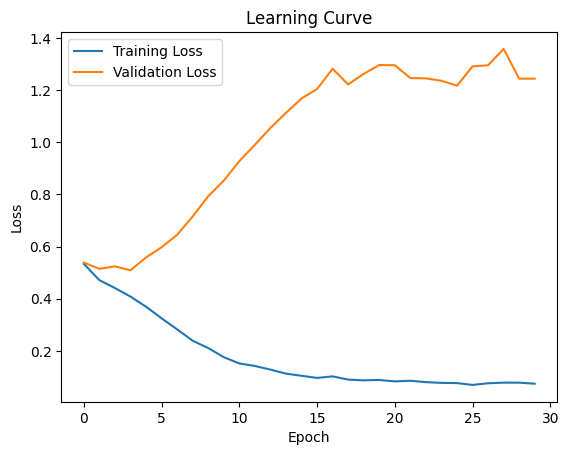

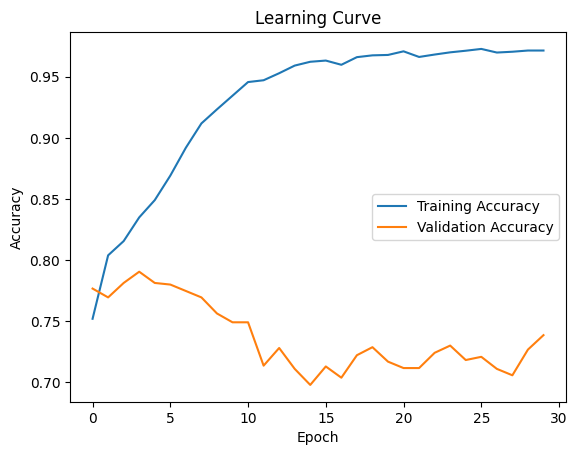

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
evaluate(model, 'simplernn')

The model is overfitting. Let's decrease the learning rate and apply some regularization techniques.

#### Regularization

In [ ]:
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(SimpleRNN(
    units=128,
    input_shape=(train_vectors.shape[1], train_vectors.shape[2]),
    kernel_regularizer=l2(1e-5),
    recurrent_regularizer=l2(1e-5),
    dropout=0.1,
    recurrent_dropout=0.1,
))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=5e-5), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)
history = model.fit(train_vectors, train_labels, epochs=100, batch_size=32, validation_data=(valid_vectors, valid_labels), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.5315 - loss: 0.7009 - val_accuracy: 0.6448 - val_loss: 0.6359
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6236 - loss: 0.6456 - val_accuracy: 0.7229 - val_loss: 0.5640
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7043 - loss: 0.5844 - val_accuracy: 0.7584 - val_loss: 0.5359
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7403 - loss: 0.5616 - val_accuracy: 0.7643 - val_loss: 0.5296
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7647 - loss: 0.5301 - val_accuracy: 0.7689 - val_loss: 0.5283
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7774 - loss: 0.5125 - val_accuracy: 0.7689 - val_loss: 0.5244
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7700 - loss: 0.5197 - val_accuracy: 0.7695 - val_loss: 0.5250
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7874 - loss: 0.4974 - val_acc

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


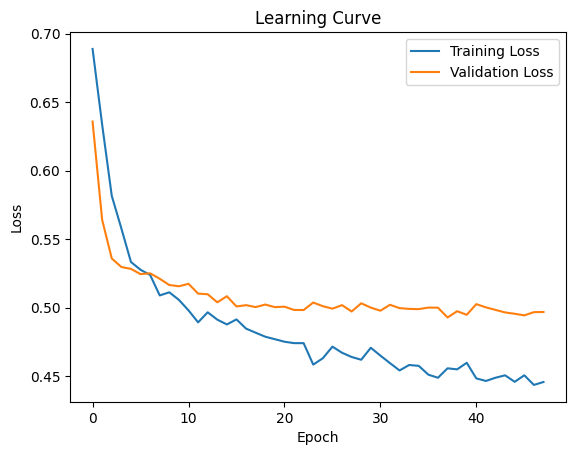

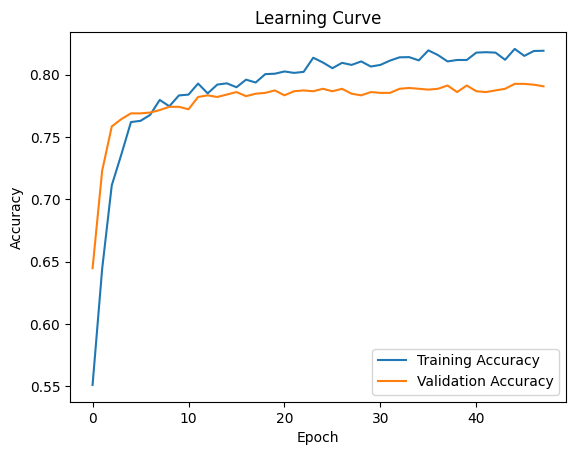

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
evaluate(model, 'simplernn_reg')

Regularization appeared to be effective; however, as the number of configurable parameters increased, I began to wonder whether a better set of hyperparameters could be found for this setting.  
To address this, I used **Optuna** to automate the hyperparameter tuning process.

**Optuna** is a library that efficiently performs hyperparameter optimization for machine learning models, using techniques such as Bayesian optimization.


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 22.1 MB/s eta 0:00:00


#### Optuna hyperparameter tuning

In [ ]:
import optuna

def objective(trial):
    rnn_units_exp = trial.suggest_int('rnn_units_exp', 4, 8, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.5)
    recurrent_dropout_rate = trial.suggest_float('recurrent_dropout_rate', 0, 0.5)
    lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)

    kernel_reg = trial.suggest_loguniform('kernel_reg', 1e-6, 1e-3)
    recurrent_reg = trial.suggest_loguniform('recurrent_reg', 1e-6, 1e-3)

    model = Sequential()
    model.add(SimpleRNN(
        units=2 ** rnn_units_exp,
        input_shape=(train_vectors.shape[1], train_vectors.shape[2]),
        kernel_regularizer=l2(kernel_reg),
        recurrent_regularizer=l2(recurrent_reg),
        dropout=dropout_rate,
        recurrent_dropout=recurrent_dropout_rate
    ))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer=RMSprop(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)

    history = model.fit(train_vectors, train_labels,
                        epochs=100,
                        batch_size=32,
                        validation_data=(valid_vectors, valid_labels),
                        callbacks=[early_stopping],
                        verbose=0)

    best_loss = min(history.history['val_loss'])
    return best_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-03-29 03:01:04,198] A new study created in memory with name: no-name-9241f03b-dda3-438b-8d62-7061d0505074
<ipython-input-26-2e33c3f245ca>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-26-2e33c3f245ca>:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  kernel_reg = trial.suggest_loguniform('kernel_reg', 1e-6, 1e-3)
<ipython-input-26-2e33c3f245ca>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  recurrent_reg = trial.suggest_loguniform('recur

Best trial:
  Value: 0.47305116057395935
  Params: 
    rnn_units_exp: 7
    dropout_rate: 0.46149102529332364
    recurrent_dropout_rate: 0.03086872191575414
    lr: 5.767369877692174e-05
    kernel_reg: 1.2317473750504966e-05
    recurrent_reg: 5.466727580770193e-06


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


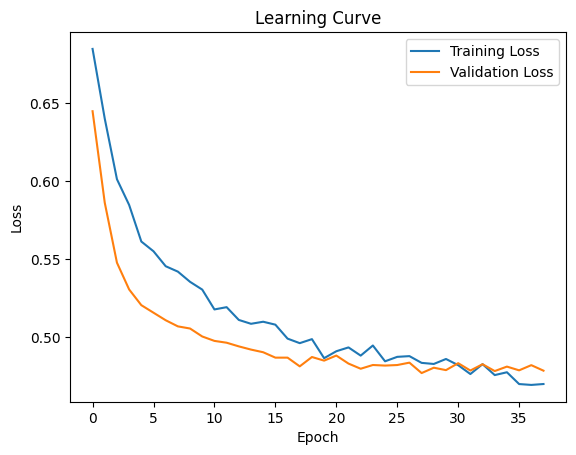

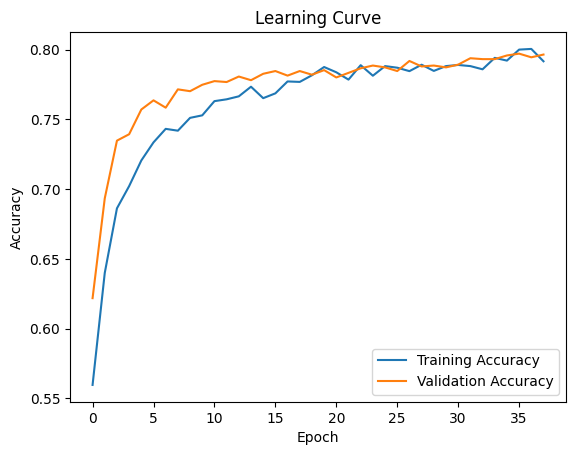

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
model = Sequential()
model.add(SimpleRNN(
    units=2**trial.params['rnn_units_exp'],
    input_shape=(train_vectors.shape[1], train_vectors.shape[2]),
    kernel_regularizer=l2(trial.params['kernel_reg']),
    recurrent_regularizer=l2(trial.params['recurrent_reg']),
    dropout=trial.params['dropout_rate'],
    recurrent_dropout=trial.params['recurrent_dropout_rate'],
))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=trial.params['lr']),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)

history = model.fit(train_vectors, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(valid_vectors, valid_labels),
                    callbacks=[early_stopping],
                    verbose=0)
evaluate(model, 'simplernn_optuna')

The validation performance improved. However, we still don't know about the test performance.

### LSTM

#### Baseline

In [ ]:

from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(units=128, input_shape=(train_vectors.shape[1], train_vectors.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)
history = model.fit(train_vectors, train_labels, epochs=100, batch_size=32, validation_data=(valid_vectors, valid_labels), callbacks=[early_stopping])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7446 - loss: 0.5194 - val_accuracy: 0.7951 - val_loss: 0.4681
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8282 - loss: 0.4101 - val_accuracy: 0.7991 - val_loss: 0.4785
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8441 - loss: 0.3824 - val_accuracy: 0.7971 - val_loss: 0.4877
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8565 - loss: 0.3593 - val_accuracy: 0.8011 - val_loss: 0.5049
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8685 - loss: 0.3390 - val_accuracy: 0.7965 - val_loss: 0.5456
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8753 - loss: 0.3169 - val_accuracy: 0.7820 - val_loss: 0.5837
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8885 - loss: 0.2915 - val_accuracy: 0.7774 - val_loss: 0.6063
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8926 - loss: 0.2739 - val_accu

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


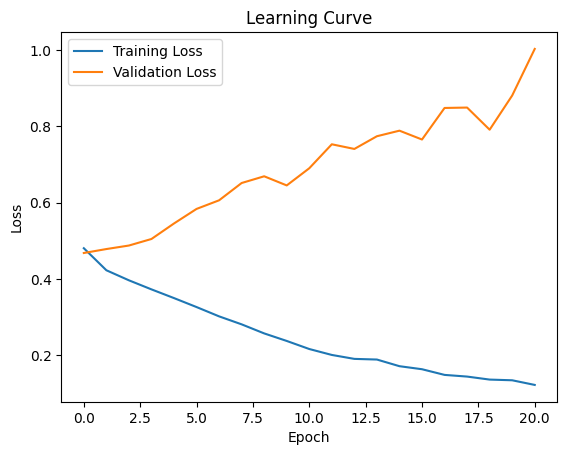

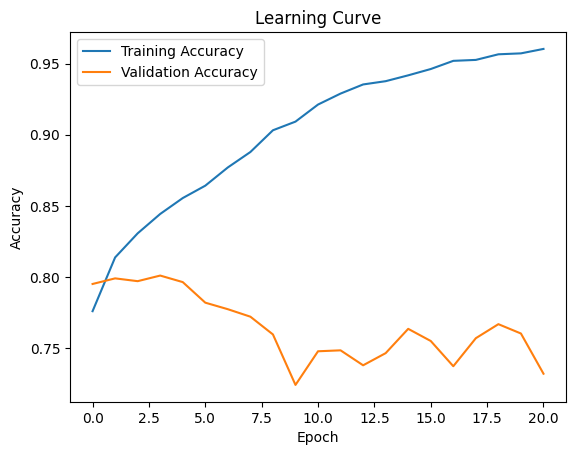

102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
evaluate(model, 'lstm')

#### Optuna hyperparameter tuning

In [30]:
def objective(trial):
    rnn_units_exp = trial.suggest_int('rnn_units_exp', 4, 8)
    dropout_rate = trial.suggest_float('dropout_rate', 0, 0.5)
    recurrent_dropout_rate = trial.suggest_float('recurrent_dropout_rate', 0, 0.5)
    lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
    kernel_reg = trial.suggest_loguniform('kernel_reg', 1e-6, 1e-3)
    recurrent_reg = trial.suggest_loguniform('recurrent_reg', 1e-6, 1e-3)

    model = Sequential()
    model.add(LSTM(
        units=2 ** rnn_units_exp,
        input_shape=(train_vectors.shape[1], train_vectors.shape[2]),
        kernel_regularizer=l2(kernel_reg),
        recurrent_regularizer=l2(recurrent_reg),
        dropout=dropout_rate,
        recurrent_dropout=recurrent_dropout_rate
    ))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=RMSprop(learning_rate=lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)

    history = model.fit(train_vectors, train_labels,
                        epochs=100,
                        batch_size=32,
                        validation_data=(valid_vectors, valid_labels),
                        callbacks=[early_stopping],
                        verbose=0)

    best_loss = min(history.history['val_loss'])
    return best_loss

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2025-03-29 03:43:01,301] A new study created in memory with name: no-name-b717338d-233b-474d-a248-0f084ea5d6a9
<ipython-input-30-d4b359bacb2a>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-6, 1e-3)
<ipython-input-30-d4b359bacb2a>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  kernel_reg = trial.suggest_loguniform('kernel_reg', 1e-6, 1e-3)
<ipython-input-30-d4b359bacb2a>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  recurrent_reg = trial.suggest_loguniform('recurr

Best trial:
  Value: 0.446755588054657
  Params: 
    rnn_units_exp: 7
    dropout_rate: 0.2998537922230238
    recurrent_dropout_rate: 0.33122812136354907
    lr: 0.00013448803949018935
    kernel_reg: 1.2563430284873313e-06
    recurrent_reg: 6.733180007857971e-06


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


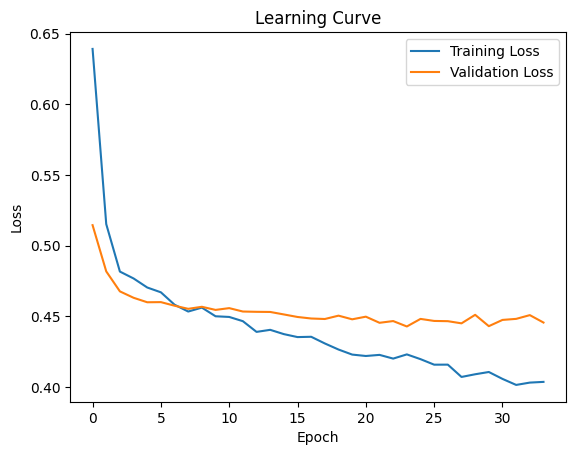

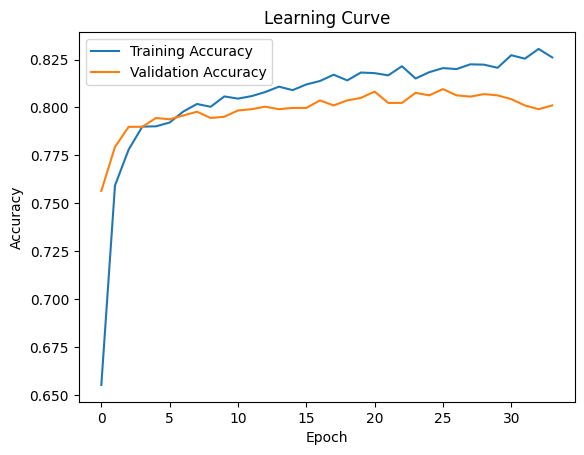

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [31]:
model = Sequential()
model.add(LSTM(
    units=2 ** trial.params['rnn_units_exp'],
    input_shape=(train_vectors.shape[1], train_vectors.shape[2]),
    kernel_regularizer=l2(trial.params['kernel_reg']),
    recurrent_regularizer=l2(trial.params['recurrent_reg']),
    dropout=trial.params['dropout_rate'],
    recurrent_dropout=trial.params['recurrent_dropout_rate'],
))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer=RMSprop(learning_rate=trial.params['lr']),
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, start_from_epoch=10)

history = model.fit(train_vectors, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_data=(valid_vectors, valid_labels),
                    callbacks=[early_stopping],
                    verbose=0)
evaluate(model, 'lstm_optuna')

In [38]:
pd.options.display.max_colwidth=1000
mispredicted_samples = valid_df[valid_df['target'] != valid_df['lstm_optuna_pred_binary']]
mispredicted_samples[['text', 'target', 'lstm_optuna_pred', 'lstm_optuna_pred_binary']].sample(20)

,text,target,lstm_optuna_pred,lstm_optuna_pred_binary
3142,@newyorkcity for the #international emergency medicine conference w/ Lennox Hill hospital and #drjustinmazur,0,0.614830,1
3156,Gonna call up tomorrow with the aul 'emergency dental appointment' excuse just like the whole tooth falling out incident of last year,1,0.427094,0
1247,Fire hazard associated with installation of non-compliant external cladding on high-rise buildings - Insurance - Aust http://t.co/wFsEaOBATo,0,0.670348,1
4876,@blairmcdougall and when will you be commenting on Ian Taylor's dealings with mass - murderer Arkan?,1,0.420565,0
4587,HEALTH FACT: 75% of muscle mass is made up of fluid. Drink water to prevent strains sprains and other injuries. http://t.co/g0dN1ChLUo,0,0.666836,1
6108,Do you feel like you are sinking in low self-image? Take the quiz: http://t.co/bJoJVM0pjX http://t.co/wHOc7LHb5F,1,0.137547,0
7262,life can wild when... \nyou're caught in a whirlwind ??,1,0.213850,0
7244,I will adamantly opposed to nuclear weapons.,1,0.275707,0
4826,Oh the usual. Mass murder and world domination plans over coffee. How's your day going?,1,0.372444,0
4262,It's a heat wave. #Squad #RevItUp #PizzaRev http://t.co/bp8bm8xSXw,1,0.469206,0


### Error Analysis Summary

- **Sarcasm and jokes**: Some false negatives involved sarcastic or humorous tweets mentioning disasters (e.g., “mass murder”) in a non-literal way. The model struggled to detect tone or intent.

- **Metaphorical language**: Tweets using poetic or figurative expressions (e.g., “crash like an avalanche”) were sometimes misclassified as real disasters due to the presence of disaster-related words.

- **Risk vs. actual event confusion**: News-style tweets discussing potential risks or safety concerns (e.g., “fire hazard”) were incorrectly classified as real disasters, indicating difficulty distinguishing between hazard warnings and actual events.

- **Formal reporting tone**: Tweets about real incidents written in a clinical or legal style (e.g., medical reports or court testimonies) were often under-predicted, possibly due to the lack of emotionally charged language.


The model heavily relies on keyword cues and lacks deep contextual comprehension. Using a contextual language model like **BERT** may help reduce such misclassifications.


## Results
Now, let's compare the results of different models using the following metrics
- ROC curves and their AUC
- Accuracy, precision, recall, and F1 score
- Confusion matrix

### ROC curves

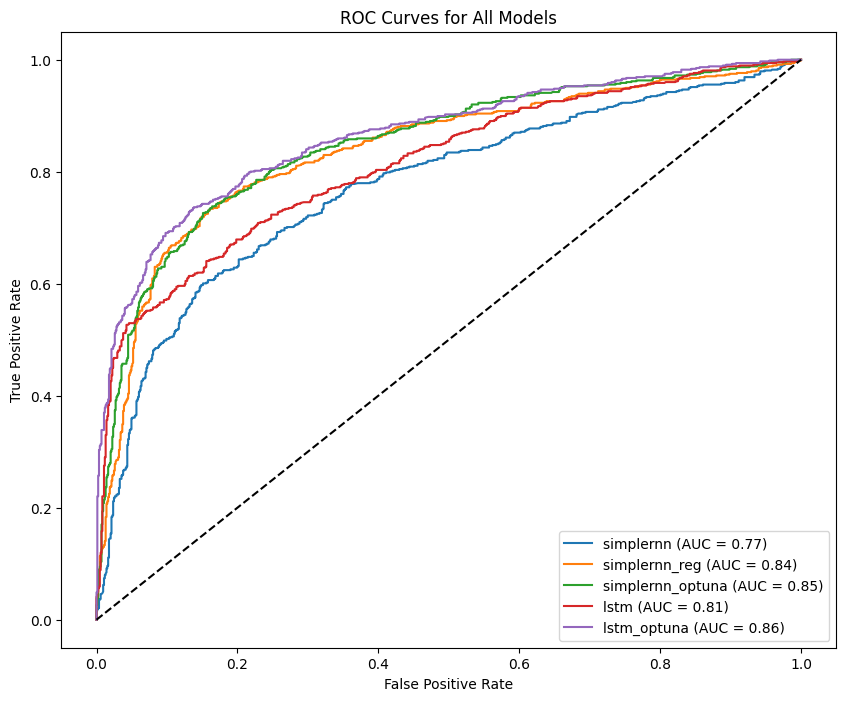

In [39]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

plt.figure(figsize=(10, 8))

models = ['simplernn', 'simplernn_reg', 'simplernn_optuna', 'lstm', 'lstm_optuna']

for model_name in models:
  fpr, tpr, thresholds = roc_curve(valid_df['target'], valid_df[f'{model_name}_pred'])
  roc_auc = auc(fpr, tpr)

  plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.show()


#### Classification metrics on `validation` dataset

In [33]:
def calculate_metrics(df, model_name):
  """Calculates accuracy, precision, recall, and F1-score for a given model."""
  y_true = df['target']
  y_pred = df[f'{model_name}_pred_binary']
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  return accuracy, precision, recall, f1

results_df = pd.DataFrame(columns=['Model', 'ROC-AUC', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

for model in models:
  if f'{model}_pred_binary' in valid_df.columns:
    roc_auc = roc_auc_score(valid_df['target'], valid_df[f'{model}_pred'])
    accuracy, precision, recall, f1 = calculate_metrics(valid_df, model)
    results_df = pd.concat([results_df, pd.DataFrame({'Model': [model], 'ROC-AUC': roc_auc, 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})], ignore_index=True)

results_df

<ipython-input-33-9860e9692f26>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Model': [model], 'ROC-AUC': roc_auc, 'Accuracy': [accuracy], 'Precision': [precision], 'Recall': [recall], 'F1-Score': [f1]})], ignore_index=True)


,Model,ROC-AUC,Accuracy,Precision,Recall,F1-Score
0,simplernn,0.772591,0.718319,0.686838,0.671598,0.679132
1,simplernn_reg,0.837986,0.791202,0.825455,0.671598,0.740620
2,simplernn_optuna,0.848878,0.787919,0.809107,0.683432,0.740978
3,lstm,0.814140,0.747866,0.766423,0.621302,0.686275
4,lstm_optuna,0.864286,0.807617,0.847550,0.690828,0.761206


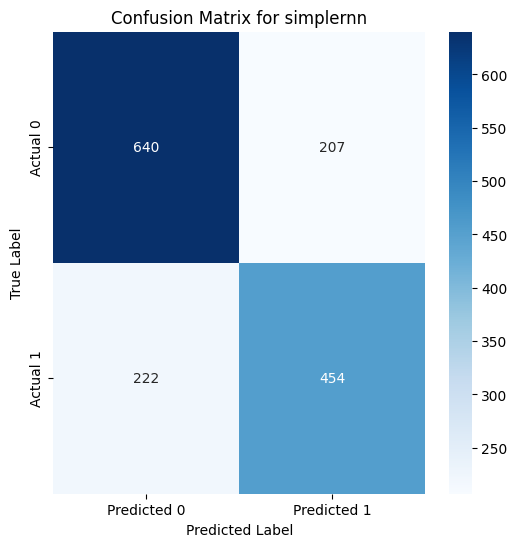

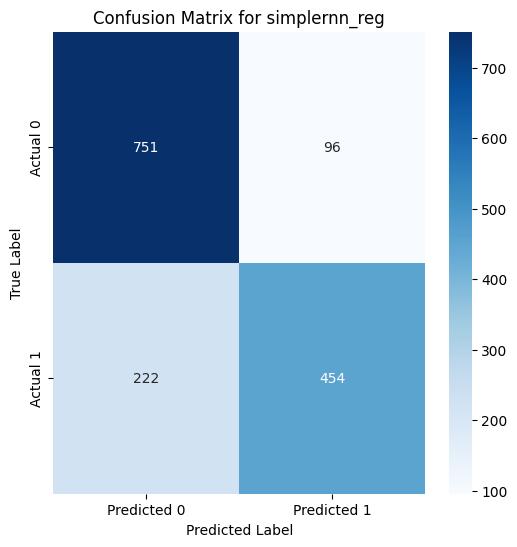

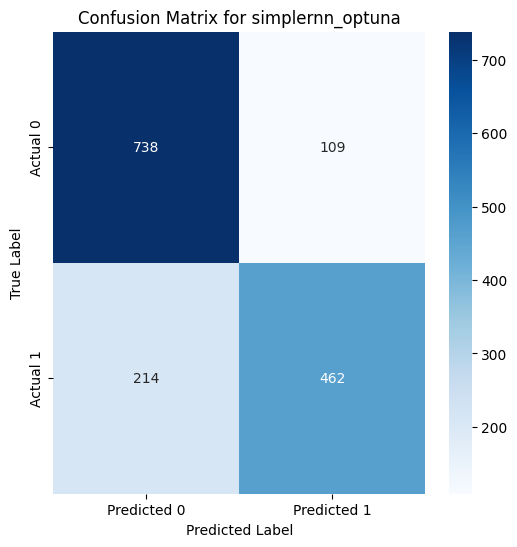

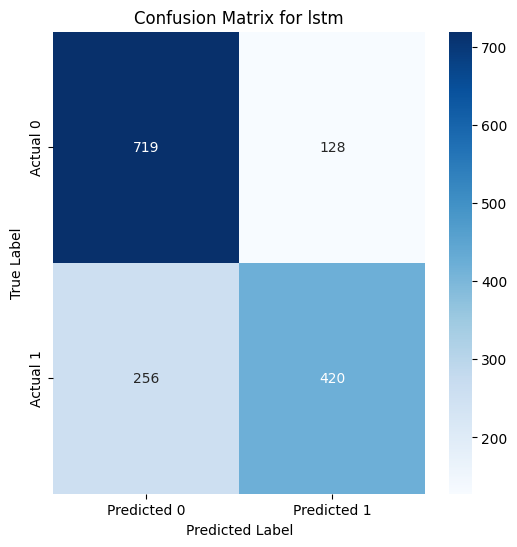

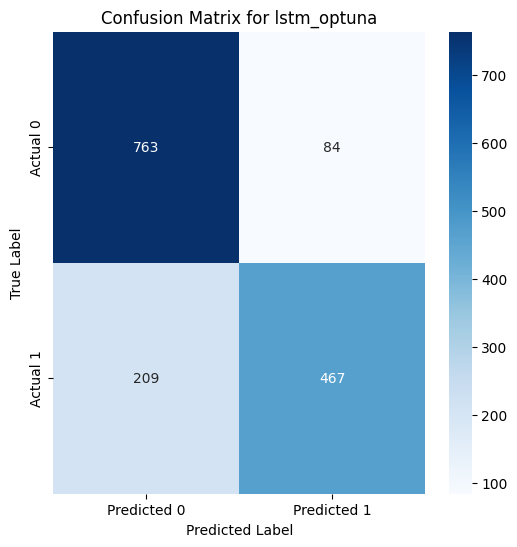

In [34]:
from sklearn.metrics import confusion_matrix

for model_name in models:
  cm = confusion_matrix(valid_df['target'], valid_df[f'{model_name}_pred_binary'])
  plt.figure(figsize=(6, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['Predicted 0', 'Predicted 1'],
              yticklabels=['Actual 0', 'Actual 1'])
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()


#### Test dataset score


| Model                  | Test Accuracy |
|------------------------|---------------|
| simplernn             | 0.74532       |
| simplernn_reg         | 0.79528       |
| simplernn_optuna      | 0.79129       |
| lstm                  | 0.76463       |
| lstm_optuna           | 0.80937       |


### Analysis

#### Performance

- The best-performing model was **LSTM with Optuna**, achieving a test accuracy of **0.80937**.  
- When comparing baseline models, the **LSTM** model outperformed the **RNN** model.  
- This is likely due to LSTM's ability to mitigate issues such as vanishing and exploding gradients, as well as its relatively higher representational capacity.  
- For the Simple RNN, hyperparameter tuning with **Optuna actually resulted in a slightly lower test score**. This may be due to **overfitting to the validation data** during the optimization process.

#### Hyperparameters

- Initially, the learning rate was too high, causing the model to overfit quickly. However, by adjusting the learning rate and applying regularization techniques such as **dropout** and **L2 regularization**, overfitting was mitigated.  
- Although regularization introduced additional hyperparameters to tune, these were efficiently optimized using Optuna with Bayesian optimization.


### Conclusion

### Conclusion

This project explored various traditional NLP techniques to classify disaster-related tweets, using models such as RNN and LSTM. Through experimentation, we found that **LSTM outperformed RNN**, likely due to its ability to better handle long-range dependencies and avoid gradient-related issues. Regularization techniques such as dropout and L2 regularization were effective in mitigating overfitting, and **Optuna** helped automate and optimize hyperparameter tuning efficiently.

While the results were satisfactory for conventional models, performance could be further improved by adopting more advanced techniques. In future work, possible improvements include:

- Leveraging **pre-trained Transformer models** such as BERT or RoBERTa to better capture contextual and semantic information.
- Incorporating **additional metadata** (e.g., hashtags, location, keyword) as auxiliary inputs to enrich the model.
- Exploring **multi-modal learning** by combining text with other relevant signals (e.g., time, user behavior, tweet popularity).
- Conducting more thorough **error analysis** to identify patterns in misclassification and guide targeted refinements.


### Disclosure
AI-assisted code completion was used in non-essential parts of the notebook.